In [46]:
# shor code phase and bitflip correction 

import numpy as np 
from qutip import *
from qutip.qip.circuit import *
from qutip.qip.operations import *

qc = QubitCircuit(N = 9, num_cbits= 3) # N is the number of qubits in the register, 
#ncbits specifies the # of classical bits for meas. and control 

# we need a starting psi state
a = 1/np.sqrt(2)*basis(2, 0)
b = 1/np.sqrt(2)*basis(2, 0)

#encoding q1 & q2 
qc.add_gate("CNOT", controls=0, targets=3)
qc.add_gate("CNOT", controls=0, targets=6)
#Insert error here 

# phase flips 
qc.add_gate("SNOT", targets=0)
qc.add_gate("SNOT", targets=3)
qc.add_gate("SNOT", targets=6)

# parity check between q1 & q2
qc.add_gate("CNOT", controls=0, targets=1)
qc.add_gate("CNOT", controls=0, targets=2)
#
qc.add_gate("CNOT", controls=3, targets=4)
qc.add_gate("CNOT", controls=3, targets=5)
#
qc.add_gate("CNOT", controls=6, targets=7)
qc.add_gate("CNOT", controls=6, targets=8)

# bit and phase flip "Error"
qc.add_gate("X", targets=0)
qc.add_gate("Z", targets=0)

# error correction t1
qc.add_gate("CNOT", controls=0, targets=1)
qc.add_gate("CNOT", controls=0, targets=2)
qc.add_gate("TOFFOLI", controls=[2, 1], targets=0)

# error correction t3
qc.add_gate("CNOT", controls=3, targets=4)
qc.add_gate("CNOT", controls=3, targets=5)
qc.add_gate("TOFFOLI", controls=[5, 4], targets=3)

# error correction t2
qc.add_gate("CNOT", controls=6, targets=7)
qc.add_gate("CNOT", controls=6, targets=8)
qc.add_gate("TOFFOLI", controls=[8, 7], targets=6)

# phase flips 
qc.add_gate("SNOT", targets=0)
qc.add_gate("SNOT", targets=3)
qc.add_gate("SNOT", targets=6)

# copying state
qc.add_gate("CNOT", controls=0, targets=3)
qc.add_gate("CNOT", controls=0, targets=6)
qc.add_gate("TOFFOLI", controls=[6, 3], targets=0)

#measure state
qc.add_measurement("M0", targets=[0], classical_store=0) # measurement gate
qc.add_measurement("M0", targets=[3], classical_store=1) # measurement gate
qc.add_measurement("M0", targets=[6], classical_store=2) # measurement gate

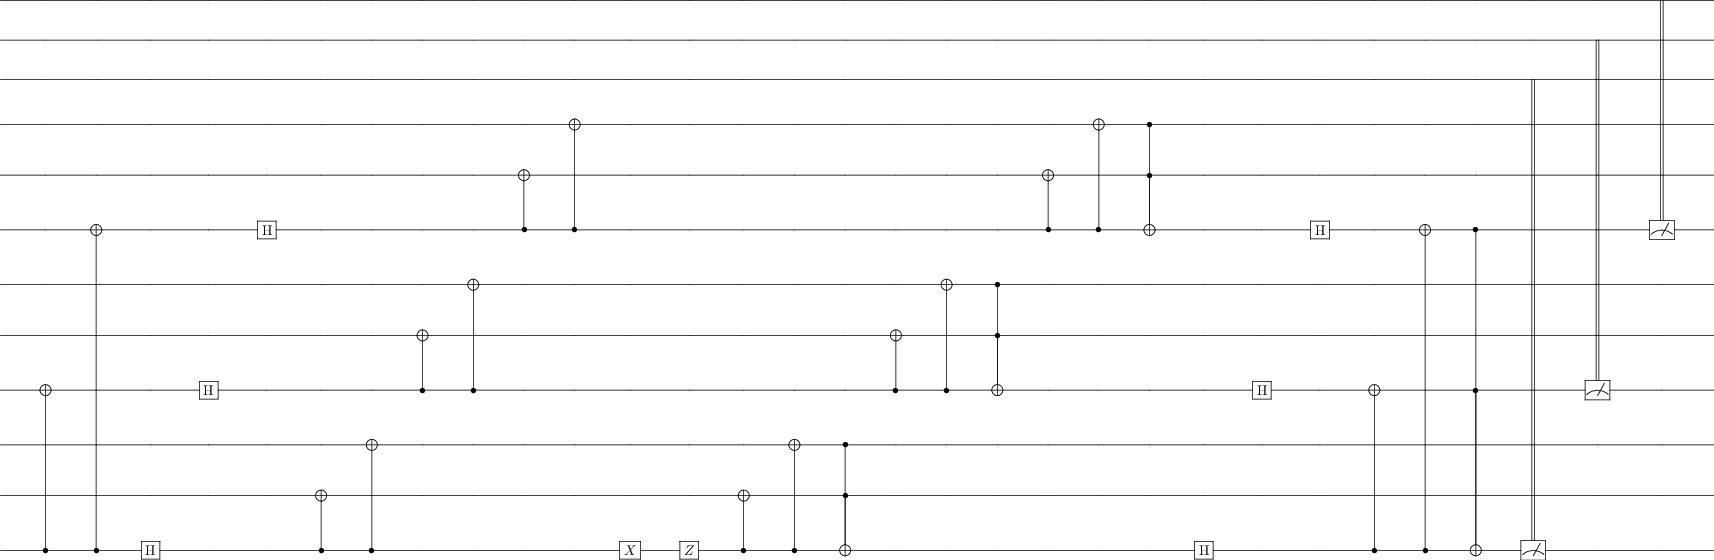

In [47]:
qc.png

In [48]:
#probability measure 

result = qc.run_statistics(state=tensor(basis(2, 0), basis(2, 0), basis(2, 0), basis(2, 0), basis(2, 0), basis(2, 0), basis(2, 0), basis(2, 0), basis(2, 0)))
states = result.get_final_states()
probabilities = result.get_probabilities()

for state, probability in zip(states, probabilities):
    print("State:\n{}\nwith probability {}".format(state, probability))

State:
Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 